# Лабораторная работа 5

### Импорт зависимостей

In [1]:
import torch
import pykeen
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pykeen.pipeline import pipeline
from sklearn.neighbors import NearestNeighbors
from pykeen.evaluation import RankBasedEvaluator
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances

### Создание датасета

In [2]:
from pykeen.datasets import PharmKG8k

In [3]:
dataset = PharmKG8k()

### Обучение модели

In [4]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [8]:
pipeline_results = pipeline(
    model="ComplEx",
    dataset=dataset,
    training_kwargs=dict(num_epochs=100),
    device=device
)

No random seed is specified. Setting to 3999297092.
You're trying to map triples with 7 entities and 0 relations that are not in the training set. These triples will be excluded from the mapping.
In total 7 from 50036 triples were filtered out
You're trying to map triples with 12 entities and 0 relations that are not in the training set. These triples will be excluded from the mapping.
In total 12 from 49536 triples were filtered out


Training epochs on cuda:0:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=2048.


Evaluating on cuda:0:   0%|          | 0.00/49.8k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 21.70s seconds


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

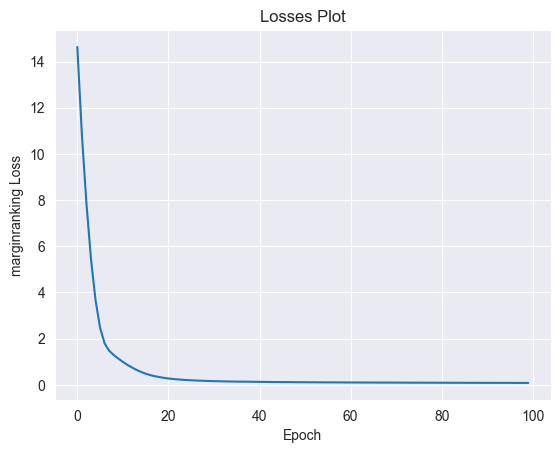

In [10]:
model = pipeline_results.model

#plot loss
pipeline_results.plot_losses()

### Оценка модели

In [11]:
# Создаем evaluator объект
evaluator = RankBasedEvaluator()

# Оценить работу модели
metrics = evaluator.evaluate(model, dataset.testing.mapped_triples,
                             additional_filter_triples=[dataset.training.mapped_triples,
                                                        dataset.validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=2048.


Evaluating on cuda:0:   0%|          | 0.00/49.8k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 22.39s seconds


Hits@1: 0.026615625753556787
Hits@3: 0.05934008520215417
Hits@5: 0.08286110441282855
Hits@10: 0.1312997347480106
Mean Reciprocal Rank: 0.06435127556324005


In [12]:
node_embeddings = pipeline_results.model.entity_representations

embedding_matrix = node_embeddings[0]._embeddings.weight.data

# Конвертируем матрицу весов в NumPy array
embedding_numpy = embedding_matrix.cpu().numpy()

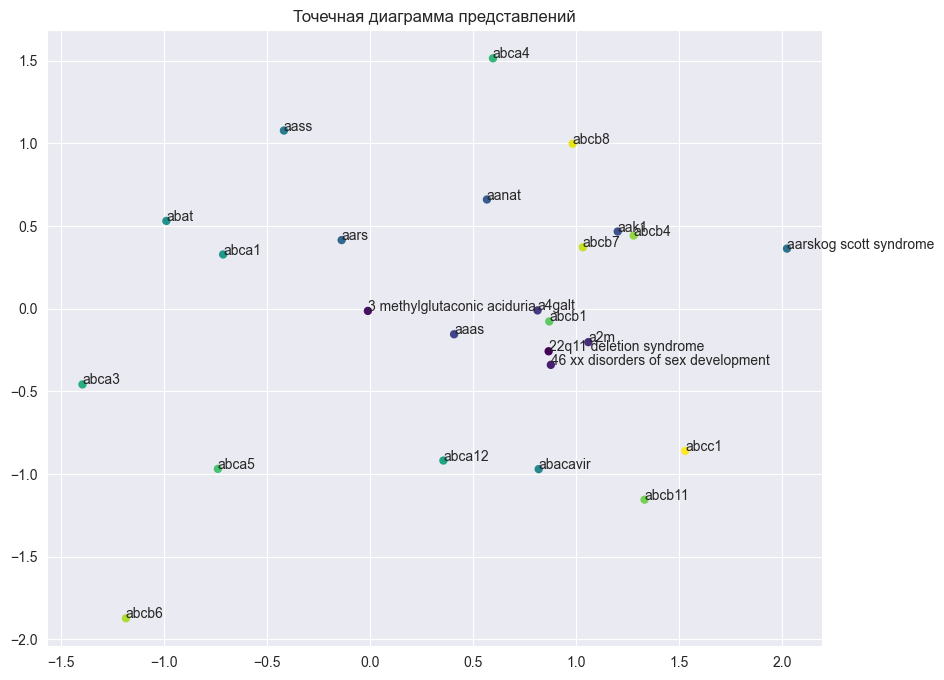

In [13]:
#Созраняем названия сущностей в отдельной переменной
id_to_lable = list(dataset.testing.entity_id_to_label.values())

def visualize_embeddings(embeddings, labels):
    # Scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], c=np.arange(len(labels)), cmap='viridis', s=25)

    # Добавляем лейблы к точкаи на графике
    for i, label in enumerate(labels):
        plt.annotate(label, (embeddings[i, 0], embeddings[i, 1]), alpha=1)

    plt.title('Точечная диаграмма представлений')
    plt.show()

#Количество точек которые необходимо отобразить на графике
number = 25

visualize_embeddings(embedding_numpy[:number], id_to_lable[:number])

[[ 0.       23.13332  23.615929 20.972258]
 [23.13332   0.       25.33086  25.96121 ]
 [23.615929 25.33086   0.       26.092064]
 [20.972258 25.96121  26.092064  0.      ]]


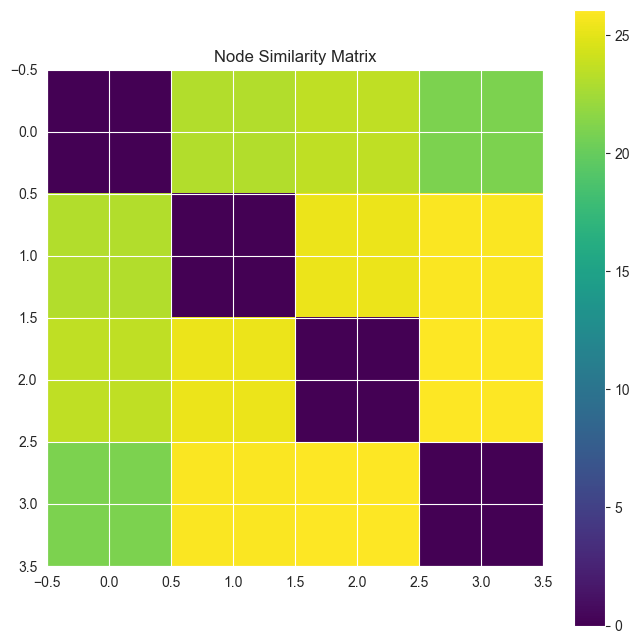

[[ 1.         -0.05189474 -0.04116264  0.10507256]
 [-0.05189474  1.          0.01345299 -0.11523868]
 [-0.04116264  0.01345299  0.9999997  -0.07845069]
 [ 0.10507256 -0.11523868 -0.07845069  1.        ]]


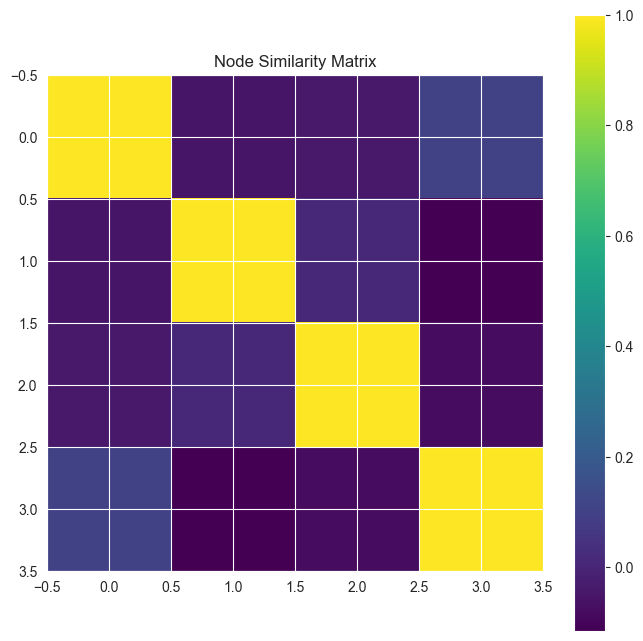

[[  0.         363.30366393 375.93014514 338.61006993]
 [363.30366393   0.         399.64291734 418.80374323]
 [375.93014514 399.64291734   0.         424.74205813]
 [338.61006993 418.80374323 424.74205813   0.        ]]


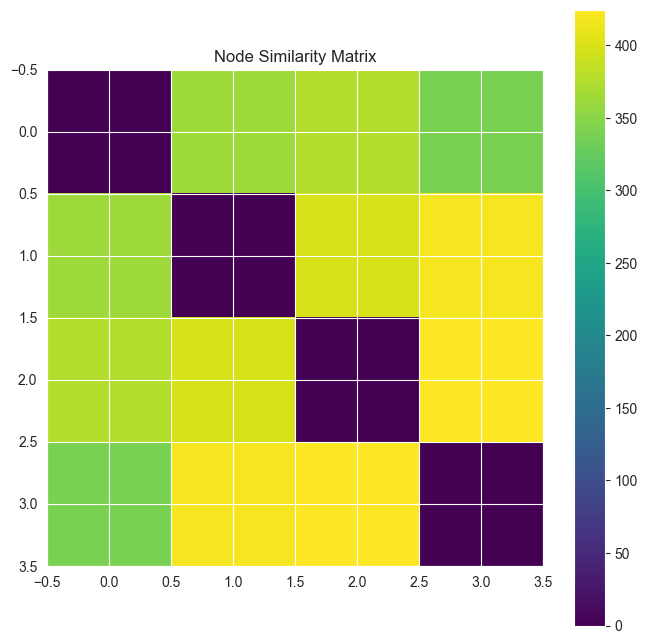

In [15]:
def diplay_matrix(similarity_matrix):
  # Визуализация матрицы близости
  plt.figure(figsize=(8, 8))
  plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
  plt.colorbar()
  plt.title('Node Similarity Matrix')
  plt.show()


# Рассчет близости между узлами
methods = [euclidean_distances,cosine_similarity,manhattan_distances]
#Узлы
nodes = [embedding_numpy[1324],embedding_numpy[122],embedding_numpy[1538],embedding_numpy[1722]]
for method in methods:
  similarity_matrix = method(nodes)
  print(similarity_matrix)
  diplay_matrix(similarity_matrix)

In [16]:
# Выбираем случайный узел
random_node_index = 1324
methods = ['nan_euclidean','cosine','manhattan']
def nearest_nodes(method):
  nn_model = NearestNeighbors(n_neighbors=4, metric=method)
  nn_model.fit(embedding_numpy)
  distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
  print('Метрика:'+method )
  print(f'Дистанции:{distances}' )
  print(f'Индексы:{indices}' )
  # Визуализация ближайших соседей
  neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
  print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")

for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[ 0.        13.76831   13.8125    13.8731365]]
Индексы:[[1324  253 1741 4607]]
Ближайшие соседи узла ciclesonide: ['ciclesonide', 'alclometasone', 'dalfopristin', 'nitrofural'] 

Метрика:cosine
Дистанции:[[0.         0.7632997  0.7888369  0.79599357]]
Индексы:[[1324  253 2243 5352]]
Ближайшие соседи узла ciclesonide: ['ciclesonide', 'alclometasone', 'estradiol valerate dienogest', 'prazepam'] 

Метрика:manhattan
Дистанции:[[  0.         220.92410278 221.30030823 221.5770874 ]]
Индексы:[[1324 5365 5103  253]]
Ближайшие соседи узла ciclesonide: ['ciclesonide', 'prednicarbate', 'phensuximide', 'alclometasone'] 



In [31]:
# Еще один узел
random_node_index = 6666
methods = ['nan_euclidean','cosine','manhattan']
def nearest_nodes(method):
  nn_model = NearestNeighbors(n_neighbors=4, metric=method)
  nn_model.fit(embedding_numpy)
  distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
  print('Метрика:'+method )
  print(f'Дистанции:{distances}' )
  print(f'Индексы:{indices}' )
  # Визуализация ближайших соседей
  neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
  print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")

for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[ 0.       22.779512 23.664177 23.841553]]
Индексы:[[6666 4521 2006   18]]
Ближайшие соседи узла thioridazine: ['thioridazine', 'neoplasms', 'drug toxicity', 'abcb1'] 

Метрика:cosine
Дистанции:[[0.         0.8102096  0.82504034 0.8284023 ]]
Индексы:[[6666 3287 5447 3144]]
Ближайшие соседи узла thioridazine: ['thioridazine', 'ifnw1', 'prostatic hyperplasia', 'hsd17b4'] 

Метрика:manhattan
Дистанции:[[  0.         366.65884399 373.73181152 374.58514404]]
Индексы:[[6666 4521   18 2006]]
Ближайшие соседи узла thioridazine: ['thioridazine', 'neoplasms', 'abcb1', 'drug toxicity'] 



### Меняем количество эпох обучения до 10

In [18]:
pipeline_results = pipeline(
    model="ComplEx",
    dataset=dataset,
    training_kwargs=dict(num_epochs=10),
    device=device
)

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=2048.


Evaluating on cuda:0:   0%|          | 0.00/49.8k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 22.69s seconds


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

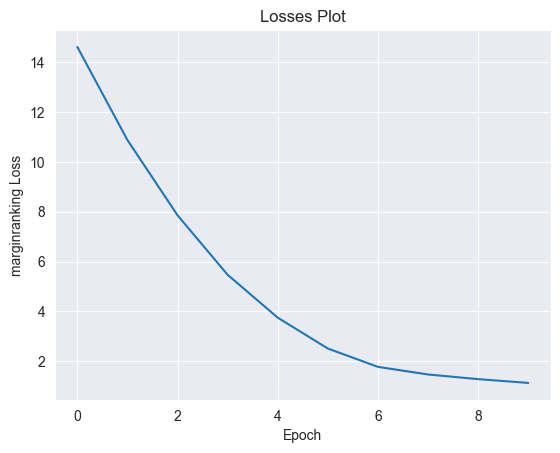

In [19]:
pipeline_results.plot_losses()

In [22]:
# Создаем evaluator объект
evaluator = RankBasedEvaluator()

model2 = pipeline_results.model
# Оценить работу модели
metrics = evaluator.evaluate(model2, dataset.testing.mapped_triples,
                             additional_filter_triples=[dataset.training.mapped_triples,
                                                        dataset.validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=2048.


Evaluating on cuda:0:   0%|          | 0.00/49.8k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 23.57s seconds


Hits@1: 0.010178040350454144
Hits@3: 0.010881360019291055
Hits@5: 0.011313399244433727
Hits@10: 0.012569327224499638
Mean Reciprocal Rank: 0.01189808640629053


In [27]:
node_embeddings = pipeline_results.model.entity_representations

embedding_matrix = node_embeddings[0]._embeddings.weight.data

# Конвертируем матрицу весов в NumPy array
embedding_numpy = embedding_matrix.cpu().numpy()

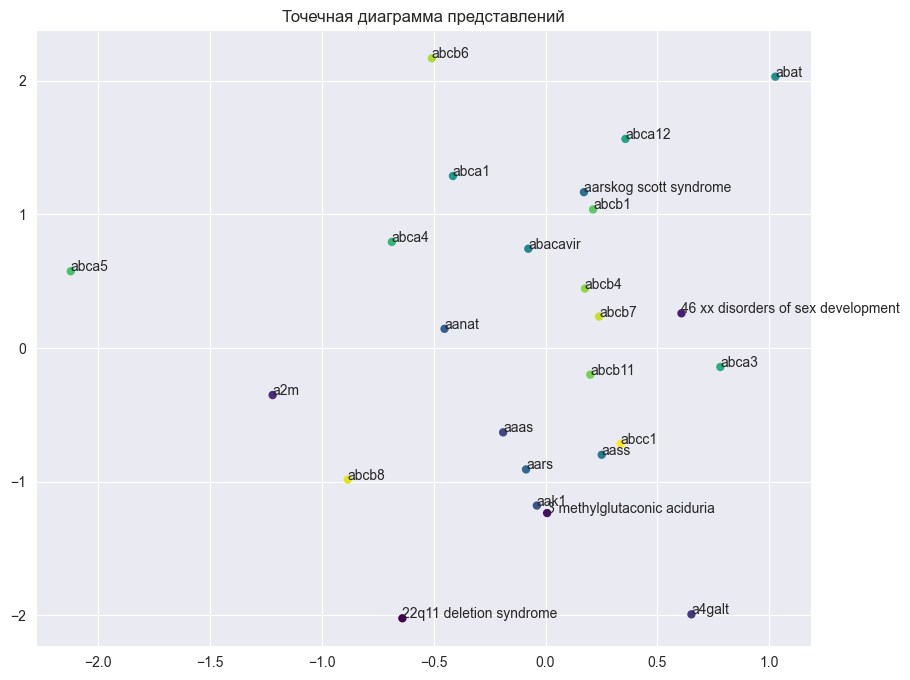

In [28]:
#Созраняем названия сущностей в отдельной переменной
id_to_lable = list(dataset.testing.entity_id_to_label.values())

def visualize_embeddings(embeddings, labels):
    # Scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], c=np.arange(len(labels)), cmap='viridis', s=25)

    # Добавляем лейблы к точкаи на графике
    for i, label in enumerate(labels):
        plt.annotate(label, (embeddings[i, 0], embeddings[i, 1]), alpha=1)

    plt.title('Точечная диаграмма представлений')
    plt.show()

#Количество точек которые необходимо отобразить на графике
number = 25

visualize_embeddings(embedding_numpy[:number], id_to_lable[:number])

In [29]:
# Выбираем случайный узел
random_node_index = 1324
methods = ['nan_euclidean','cosine','manhattan']
def nearest_nodes(method):
  nn_model = NearestNeighbors(n_neighbors=4, metric=method)
  nn_model.fit(embedding_numpy)
  distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
  print('Метрика:'+method )
  print(f'Дистанции:{distances}' )
  print(f'Индексы:{indices}' )
  # Визуализация ближайших соседей
  neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
  print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")

for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[ 0.       22.680742 22.864573 23.014605]]
Индексы:[[1324 3596 1868 4521]]
Ближайшие соседи узла ciclesonide: ['ciclesonide', 'kidney diseases', 'diabetes mellitus', 'neoplasms'] 

Метрика:cosine
Дистанции:[[0.         0.79626626 0.8154787  0.82131094]]
Индексы:[[1324 3190 1708 1066]]
Ближайшие соседи узла ciclesonide: ['ciclesonide', 'hydrochlorothiazide', 'cyp2w1', 'cd163'] 

Метрика:manhattan
Дистанции:[[  0.         361.69448853 362.61068726 363.85952759]]
Индексы:[[1324 4521 3596 1868]]
Ближайшие соседи узла ciclesonide: ['ciclesonide', 'neoplasms', 'kidney diseases', 'diabetes mellitus'] 



In [32]:
# Еще один узел
random_node_index = 6666
methods = ['nan_euclidean','cosine','manhattan']
def nearest_nodes(method):
  nn_model = NearestNeighbors(n_neighbors=4, metric=method)
  nn_model.fit(embedding_numpy)
  distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
  print('Метрика:'+method )
  print(f'Дистанции:{distances}' )
  print(f'Индексы:{indices}' )
  # Визуализация ближайших соседей
  neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
  print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")

for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[ 0.       22.779512 23.664177 23.841553]]
Индексы:[[6666 4521 2006   18]]
Ближайшие соседи узла thioridazine: ['thioridazine', 'neoplasms', 'drug toxicity', 'abcb1'] 

Метрика:cosine
Дистанции:[[0.         0.8102096  0.82504034 0.8284023 ]]
Индексы:[[6666 3287 5447 3144]]
Ближайшие соседи узла thioridazine: ['thioridazine', 'ifnw1', 'prostatic hyperplasia', 'hsd17b4'] 

Метрика:manhattan
Дистанции:[[  0.         366.65884399 373.73181152 374.58514404]]
Индексы:[[6666 4521   18 2006]]
Ближайшие соседи узла thioridazine: ['thioridazine', 'neoplasms', 'abcb1', 'drug toxicity'] 



### Меняем модель

In [5]:
pipeline_results = pipeline(
    model="HolE",
    dataset=dataset,
    training_kwargs=dict(num_epochs=50),
    device=device
)

No random seed is specified. Setting to 521188580.
You're trying to map triples with 7 entities and 0 relations that are not in the training set. These triples will be excluded from the mapping.
In total 7 from 50036 triples were filtered out
You're trying to map triples with 12 entities and 0 relations that are not in the training set. These triples will be excluded from the mapping.
In total 12 from 49536 triples were filtered out


Training epochs on cuda:0:   0%|          | 0/50 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/1511 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=1024.


Evaluating on cuda:0:   0%|          | 0.00/49.8k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 150.82s seconds


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

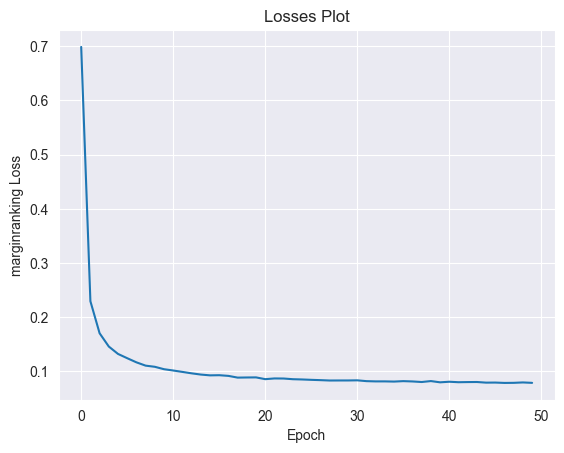

In [7]:
model3 = pipeline_results.model

#plot loss
pipeline_results.plot_losses()

In [8]:
# Создаем evaluator объект
evaluator = RankBasedEvaluator()
model3 = pipeline_results.model
# Оценить работу модели
metrics = evaluator.evaluate(model3, dataset.testing.mapped_triples,
                             additional_filter_triples=[dataset.training.mapped_triples,
                                                        dataset.validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=1024.


Evaluating on cuda:0:   0%|          | 0.00/49.8k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 148.13s seconds


Hits@1: 0.03132786753476409
Hits@3: 0.07667189132706374
Hits@5: 0.10775862068965517
Hits@10: 0.16548107065348444
Mean Reciprocal Rank: 0.07857898622751236


In [9]:
node_embeddings = pipeline_results.model.entity_representations

embedding_matrix = node_embeddings[0]._embeddings.weight.data

# Конвертируем матрицу весов в NumPy array
embedding_numpy = embedding_matrix.cpu().numpy()

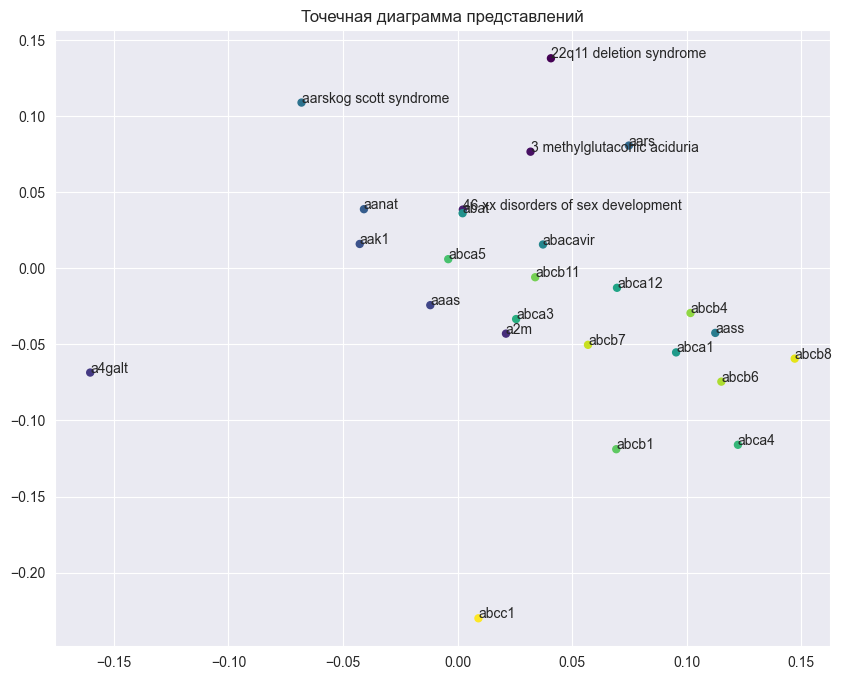

In [10]:
#Созраняем названия сущностей в отдельной переменной
id_to_lable = list(dataset.testing.entity_id_to_label.values())

def visualize_embeddings(embeddings, labels):
    # Scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], c=np.arange(len(labels)), cmap='viridis', s=25)

    # Добавляем лейблы к точкаи на графике
    for i, label in enumerate(labels):
        plt.annotate(label, (embeddings[i, 0], embeddings[i, 1]), alpha=1)

    plt.title('Точечная диаграмма представлений')
    plt.show()

#Количество точек которые необходимо отобразить на графике
number = 25

visualize_embeddings(embedding_numpy[:number], id_to_lable[:number])

In [11]:
# Выбираем случайный узел
random_node_index = 1324
methods = ['nan_euclidean','cosine','manhattan']
def nearest_nodes(method):
  nn_model = NearestNeighbors(n_neighbors=4, metric=method)
  nn_model.fit(embedding_numpy)
  distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
  print('Метрика:'+method )
  print(f'Дистанции:{distances}' )
  print(f'Индексы:{indices}' )
  # Визуализация ближайших соседей
  neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
  print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")

for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[0.        1.114225  1.1307347 1.1508816]]
Индексы:[[1324 6844  718  846]]
Ближайшие соседи узла ciclesonide: ['ciclesonide', 'triamcinolone', 'bepotastine', 'budesonide'] 

Метрика:cosine
Дистанции:[[0.         0.633343   0.63928044 0.6633811 ]]
Индексы:[[1324 6844  718  542]]
Ближайшие соседи узла ciclesonide: ['ciclesonide', 'triamcinolone', 'bepotastine', 'astemizole'] 

Метрика:manhattan
Дистанции:[[ 0.         12.21582985 12.56019402 12.71134758]]
Индексы:[[1324 6844  718 3848]]
Ближайшие соседи узла ciclesonide: ['ciclesonide', 'triamcinolone', 'bepotastine', 'loratadine'] 



In [12]:
# Еще один узел
random_node_index = 6666
methods = ['nan_euclidean','cosine','manhattan']
def nearest_nodes(method):
  nn_model = NearestNeighbors(n_neighbors=4, metric=method)
  nn_model.fit(embedding_numpy)
  distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
  print('Метрика:'+method )
  print(f'Дистанции:{distances}' )
  print(f'Индексы:{indices}' )
  # Визуализация ближайших соседей
  neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
  print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")

for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[0.        0.9583598 0.9836091 0.9914771]]
Индексы:[[6666 5046 6668 1275]]
Ближайшие соседи узла thioridazine: ['thioridazine', 'perphenazine', 'thiothixene', 'chlorpromazine'] 

Метрика:cosine
Дистанции:[[0.         0.49048686 0.5032318  0.50632006]]
Индексы:[[6666 5046 6668 1275]]
Ближайшие соседи узла thioridazine: ['thioridazine', 'perphenazine', 'thiothixene', 'chlorpromazine'] 

Метрика:manhattan
Дистанции:[[ 0.         10.44112015 10.76989937 10.97903919]]
Индексы:[[6666 5046 1969 5776]]
Ближайшие соседи узла thioridazine: ['thioridazine', 'perphenazine', 'dopamine', 'ritonavir'] 

